## Temperature data demo
This is a demo exhibiting the data used in Hausfather, Drake, Abbott, and Schmidt (2019), Evaluating the performance of past climate model projections, *Geophysical Research Letters*, https://doi.org/10.1029/2019GL085378. This demo provides some basic code snippets for reading in the raw model and observational data, doing some basic data processing (e.g. calculating anomaly relative to a given reference period), and making a plot of the time-series.


In [8]:
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams.update({'font.size': 16})

In [3]:
obs_file = '../data/raw/obs_temp_data/combined_temps_Jan_2019.csv'
models_file = '../data/raw/model_temp_data/Model timeseries.xlsx'

In [4]:
obs_df = pd.read_csv(obs_file) # read observation spreadsheet
obs_ds = obs_df.to_xarray().swap_dims({'index': 'year'}).groupby('year').mean() # convert to xarray dataset

# calculate mean of the five observational data products (for simplicity)
obs_ds['mean'] = (obs_ds['hadcrut4'] + obs_ds['gistemp'] + obs_ds['noaa'] + obs_ds['berkeley'] + obs_ds['cowtan_way'])/5.

models_df = pd.read_excel(models_file, sheet_name = 'Individual papers') # read model spreadhsheet
models_df.columns = map(str.lower, models_df.columns)
models_ds = models_df.to_xarray().swap_dims({'index': 'year'}) # convert to xarray dataset

/anaconda3/envs/OldModels/lib/python3.8/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [5]:
# List of 15 references (only choosing middle ground scenarios for Hansen papers and IPCC)
model_list = [
    'manabe_1970',
    'mitchell_1970',
    'benson_1970',
    'rasool_schneider_1971',
    'sawyer_1972',
    'broecker_1975',
    'nordhaus_1977',
    'schneider_thompson_1981',
    'hansen_1981_2a',
    'hansen_1988_b',
    'manabe_stouffer_1993',
    'far_ebm_best',
    'sar_ebm_best',
    'tar_ebm_best',
    'ar4_mmm_best'
]

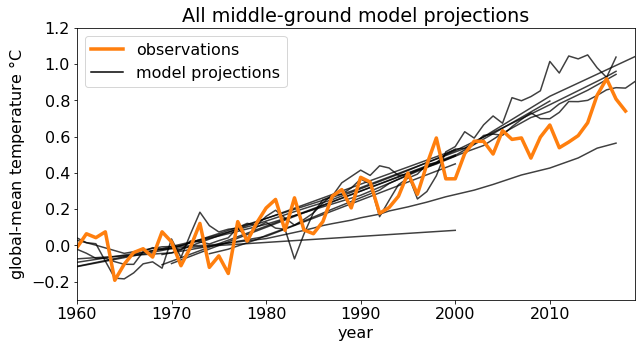

In [7]:
reference_period = slice(1960,1980)

plt.figure(figsize=(10,5))
for model in model_list:
    anom = (
        models_ds[model+'_t'].sel(year=slice(1960,2019)) -
        models_ds[model+'_t'].sel(year=reference_period).mean(dim='year')
    )
    anom.plot(color='black', alpha=0.75, linewidth = 1.5)
    
obs_anom = obs_ds['mean'] - obs_ds['mean'].sel(year=reference_period).mean(dim='year')
obs_anom.plot(linewidth = 3.5, color='C1', label='observations')

plt.plot([],[],"k-",label='model projections')
plt.ylabel(r'global-mean temperature $\degree$C');
plt.xlim([1960,2019])
plt.ylim([-0.3,1.2])
plt.legend()
plt.title('All middle-ground model projections');
